**PART 1 : DATA CLEANING**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# importing the London energy dataset
data=pd.read_csv('LCL-FullData\CC_LCL-FullData.csv')

In [3]:
# Checking the unique rows count of every column
data.describe()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
count,167932474,167932474,167932474,167932474
unique,5566,2,40405,7527
top,MAC000145,Std,2012-11-20 00:00:00.0000000,0
freq,39752,134148703,11062,2002920


In [3]:
data['LCLid'].unique()

array(['MAC000002', 'MAC000003', 'MAC000004', ..., 'MAC005557',
       'MAC005564', 'MAC005565'], dtype=object)

In [5]:
# Checking the datatype of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167932474 entries, 0 to 167932473
Data columns (total 4 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   LCLid                    object
 1   stdorToU                 object
 2   DateTime                 object
 3   KWH/hh (per half hour)   object
dtypes: object(4)
memory usage: 5.0+ GB


In [4]:
num_unique_customers = len(data['LCLid'].unique())
print("Number of unique customers: ", num_unique_customers)

Number of unique customers:  5566


In [5]:
# Re-naming the column to make it small
data.columns = ['LCLid', 'stdorToU', 'DateTime', 'KWH/hh']
print(data.columns)

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh'], dtype='object')


In [8]:
data

,LCLid,stdorToU,DateTime,KWH/hh
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
...,...,...,...,...
167932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022
167932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188
167932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073
167932472,MAC005565,ToU,2012-06-21 07:00:00.0000000,0.025


In [6]:
# Checking the NAN values for each column
data.isna().sum()

LCLid       0
stdorToU    0
DateTime    0
KWH/hh      0
dtype: int64

In [7]:
# Checking the Null values for each column
data.isnull().sum()

LCLid       0
stdorToU    0
DateTime    0
KWH/hh      0
dtype: int64

In [8]:
# making KWH/hh float type
data2 = data.copy()
data2['KWH/hh'] = data2['KWH/hh'].replace('Null', np.nan).astype('float32')
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167932474 entries, 0 to 167932473
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   LCLid     object 
 1   stdorToU  object 
 2   DateTime  object 
 3   KWH/hh    float32
dtypes: float32(1), object(3)
memory usage: 4.4+ GB


In [9]:
data2

,LCLid,stdorToU,DateTime,KWH/hh
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.000
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.000
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.000
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.000
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.000
...,...,...,...,...
167932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022
167932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188
167932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073
167932472,MAC005565,ToU,2012-06-21 07:00:00.0000000,0.025


In [10]:
# checking kwh avg per LCLid
avg_kwh = data2.groupby('LCLid')['KWH/hh'].mean()
print(avg_kwh)

LCLid
MAC000002    0.252562
MAC000003    0.397666
MAC000004    0.035383
MAC000005    0.095388
MAC000006    0.059471
               ...   
MAC005563         NaN
MAC005564    0.083904
MAC005565    0.131591
MAC005566    0.363100
MAC005567    0.108561
Name: KWH/hh, Length: 5566, dtype: float32


In [11]:
# identify rows with NaN KWH/hh values and dropping
nan_rows = data2['KWH/hh'].isna()
# dropping nan values
data2.dropna(subset=["KWH/hh"], inplace=True)

In [12]:
# checking kwh avg per LCLid again after dropping values
avg_kwh = data2.groupby('LCLid')['KWH/hh'].mean()
print(avg_kwh)

LCLid
MAC000002    0.252562
MAC000003    0.397666
MAC000004    0.035383
MAC000005    0.095388
MAC000006    0.059471
               ...   
MAC005562    0.218019
MAC005564    0.083904
MAC005565    0.131591
MAC005566    0.363100
MAC005567    0.108561
Name: KWH/hh, Length: 5561, dtype: float32


In [13]:
# checking min,max,mean value of avg
min_avgkwh = avg_kwh.min()
max_avgkwh = avg_kwh.max()
avg_avgkwh = avg_kwh.mean()
# checking min,max,mean value of avg
print(min_avgkwh, max_avgkwh, avg_avgkwh)

0.0 2.1110518 0.21289462


In [14]:
# checking min,max,mean value of avg (setting boundaries)
KWH_less_than_009 = (avg_kwh < 0.09).sum()
KWH_more_than_135 = (avg_kwh > 1.35).sum()

# print the results
print(KWH_less_than_009, KWH_more_than_135)

879 10


In [15]:
#transferring for data cleaning
data3 = data2.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167932474 entries, 0 to 167932473
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   LCLid     object
 1   stdorToU  object
 2   DateTime  object
 3   KWH/hh    object
dtypes: object(4)
memory usage: 5.0+ GB


In [16]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167926914 entries, 0 to 167932472
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   LCLid     object 
 1   stdorToU  object 
 2   DateTime  object 
 3   KWH/hh    float32
dtypes: float32(1), object(3)
memory usage: 5.6+ GB


In [17]:
# droping rows as per limits set
Yavg_kwh = data3.groupby('LCLid')['KWH/hh'].mean()

# drop rows where the average 'KWH/hh' is less than 0.09 or more than 1.35
to_drop = Yavg_kwh[(Yavg_kwh < 0.09) | (Yavg_kwh > 1.35)].index

to_drop


Index(['MAC000004', 'MAC000006', 'MAC000012', 'MAC000016', 'MAC000029',
       'MAC000036', 'MAC000037', 'MAC000043', 'MAC000058', 'MAC000070',
       ...
       'MAC005491', 'MAC005498', 'MAC005512', 'MAC005514', 'MAC005517',
       'MAC005535', 'MAC005536', 'MAC005538', 'MAC005558', 'MAC005564'],
      dtype='object', name='LCLid', length=889)

In [18]:
data3 = data3[~data3['LCLid'].isin(to_drop)]


In [19]:
# reset the index of the dataframe
data3 = data3.reset_index(drop=True)
data3

,LCLid,stdorToU,DateTime,KWH/hh
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.000
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.000
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.000
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.000
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.000
...,...,...,...,...
141063812,MAC005565,ToU,2012-06-21 05:00:00.0000000,0.128
141063813,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022
141063814,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188
141063815,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073


In [20]:
data4 = data.copy()
data4

,LCLid,stdorToU,DateTime,KWH/hh
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
...,...,...,...,...
167932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022
167932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188
167932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073
167932472,MAC005565,ToU,2012-06-21 07:00:00.0000000,0.025


In [21]:
data.info()
data2.info()
data3.info()
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167932474 entries, 0 to 167932473
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   LCLid     object
 1   stdorToU  object
 2   DateTime  object
 3   KWH/hh    object
dtypes: object(4)
memory usage: 5.0+ GB
<class 'pandas.core.frame.DataFrame'>
Index: 167926914 entries, 0 to 167932472
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   LCLid     object 
 1   stdorToU  object 
 2   DateTime  object 
 3   KWH/hh    float32
dtypes: float32(1), object(3)
memory usage: 5.6+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141063817 entries, 0 to 141063816
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   LCLid     object 
 1   stdorToU  object 
 2   DateTime  object 
 3   KWH/hh    float32
dtypes: float32(1), object(3)
memory usage: 3.7+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167932474 entries, 0 to 167932473
Data columns (total 4

In [22]:

data4['KWH/hh'] = data4['KWH/hh'].replace('Null', np.nan)
data4


,LCLid,stdorToU,DateTime,KWH/hh
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
...,...,...,...,...
167932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022
167932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188
167932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073
167932472,MAC005565,ToU,2012-06-21 07:00:00.0000000,0.025


In [23]:
# dropping nan values
data4.dropna(subset=['KWH/hh'],inplace=True)
data4.info()
data4

<class 'pandas.core.frame.DataFrame'>
Index: 167926914 entries, 0 to 167932472
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   LCLid     object
 1   stdorToU  object
 2   DateTime  object
 3   KWH/hh    object
dtypes: object(4)
memory usage: 6.3+ GB


,LCLid,stdorToU,DateTime,KWH/hh
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
...,...,...,...,...
167932468,MAC005565,ToU,2012-06-21 05:00:00.0000000,0.128
167932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022
167932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188
167932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073


In [24]:
data4 = data4[~data4['LCLid'].isin(to_drop)]

# reset the index of the dataframe
data4 = data4.reset_index(drop=True)
data4

,LCLid,stdorToU,DateTime,KWH/hh
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
...,...,...,...,...
141063812,MAC005565,ToU,2012-06-21 05:00:00.0000000,0.128
141063813,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022
141063814,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188
141063815,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073


In [25]:
# counting readings
count_s = data3.groupby('LCLid')['KWH/hh'].count()
print(count_s)

LCLid
MAC000002    24157
MAC000003    35468
MAC000005    30526
MAC000007    25045
MAC000008    26012
             ...  
MAC005561    27588
MAC005562    31699
MAC005565       44
MAC005566    24640
MAC005567    20896
Name: KWH/hh, Length: 4672, dtype: int64


In [26]:
# checking drop values existance
exists = "MAC000004" in data3['LCLid'].values
print(exists)

False


In [27]:
# checking grouped statistics
grouped_data3 = data3.groupby('LCLid')

**USING K-MEANS FOR CLUSTERING THE LCLId's into 18 Groups as per London Household ACORN INDEX**

In [28]:
# calculate the median, average, sum, highest, and lowest energy consumption for each 'LCLid'
median_consumption = grouped_data3['KWH/hh'].median()
average_consumption = grouped_data3['KWH/hh'].mean()
sum_consumption = grouped_data3['KWH/hh'].sum()
highest_consumption = grouped_data3['KWH/hh'].max()
lowest_consumption = grouped_data3['KWH/hh'].min()

In [29]:
# checking grouped statistics
# print the results
print('Energy consumption median:')
print(median_consumption)
print('Energy consumption average:')
print(average_consumption)

print('Energy consumption sum:')
print(sum_consumption)

print('Highest recorded energy consumption:')
print(highest_consumption)

print('Lowest recorded energy consumption:')
print(lowest_consumption)

Energy consumption median:
LCLid
MAC000002    0.158
MAC000003    0.166
MAC000005    0.041
MAC000007    0.115
MAC000008    0.296
             ...  
MAC005561    0.094
MAC005562    0.170
MAC005565    0.114
MAC005566    0.163
MAC005567    0.062
Name: KWH/hh, Length: 4672, dtype: float32
Energy consumption average:
LCLid
MAC000002    0.252562
MAC000003    0.397666
MAC000005    0.095388
MAC000007    0.197805
MAC000008    0.363102
               ...   
MAC005561    0.152001
MAC005562    0.218019
MAC005565    0.131591
MAC005566    0.363100
MAC005567    0.108561
Name: KWH/hh, Length: 4672, dtype: float32
Energy consumption sum:
LCLid
MAC000002     6101.138184
MAC000003    14104.432617
MAC000005     2911.808105
MAC000007     4954.017090
MAC000008     9445.006836
                 ...     
MAC005561     4193.401855
MAC005562     6910.988770
MAC005565        5.790000
MAC005566     8946.789062
MAC005567     2268.485107
Name: KWH/hh, Length: 4672, dtype: float32
Highest recorded energy consumption:


In [30]:
unique_count = data3['LCLid'].nunique()
print("Number of unique LCLids:", unique_count)

Number of unique LCLids: 4672


In [31]:
#create a new dataframe with the required features
kmeans_data = pd.DataFrame({
    'LCLid': grouped_data3['KWH/hh'].median().index,
    'median_consumption': median_consumption,
    'average_consumption': average_consumption,
    'sum_consumption': sum_consumption,
    'highest_consumption': highest_consumption,
    'lowest_consumption': lowest_consumption
})

In [32]:
kmeans_data

,LCLid,median_consumption,average_consumption,sum_consumption,highest_consumption,lowest_consumption
LCLid,,,,,,
MAC000002,MAC000002,0.158,0.252562,6101.138184,2.994,0.000
MAC000003,MAC000003,0.166,0.397666,14104.432617,3.921,0.007
MAC000005,MAC000005,0.041,0.095388,2911.808105,1.979,0.010
MAC000007,MAC000007,0.115,0.197805,4954.017090,3.784,0.015
MAC000008,MAC000008,0.296,0.363102,9445.006836,3.581,0.000
...,...,...,...,...,...,...
MAC005561,MAC005561,0.094,0.152001,4193.401855,1.886,0.017
MAC005562,MAC005562,0.170,0.218019,6910.988770,1.879,0.008
MAC005565,MAC005565,0.114,0.131591,5.790000,1.022,0.010


In [33]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_data_scaled = scaler.fit_transform(kmeans_data.iloc[:, 1:5])

In [34]:
# apply KMeans algorithm to divide the LCLIDs into 18 groups
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=18, random_state=42)
kmeans.fit(kmeans_data_scaled)

c:\Users\aduttagu\.conda\envs\pyTut\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aduttagu\.conda\envs\pyTut\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=19.
  warnings.warn(


KMeans(n_clusters=18, random_state=42)

In [35]:
# add cluster labels to the dataframe
kmeans_data['cluster'] = kmeans.labels_
# print the number of LCLIDs in each cluster
print(kmeans_data['cluster'].value_counts())


cluster
8     670
11    567
2     493
12    452
7     448
16    409
3     314
14    282
0     228
13    200
9     163
4     113
15     84
10     83
5      71
1      49
6      34
17     12
Name: count, dtype: int64


In [36]:
#checking K-means data with cluster added
# reset the index of kmeans_data
kmeans_data = kmeans_data.reset_index(drop=True)
kmeans_data

,LCLid,median_consumption,average_consumption,sum_consumption,highest_consumption,lowest_consumption,cluster
0,MAC000002,0.158,0.252562,6101.138184,2.994,0.000,12
1,MAC000003,0.166,0.397666,14104.432617,3.921,0.007,13
2,MAC000005,0.041,0.095388,2911.808105,1.979,0.010,8
3,MAC000007,0.115,0.197805,4954.017090,3.784,0.015,9
4,MAC000008,0.296,0.363102,9445.006836,3.581,0.000,13
...,...,...,...,...,...,...,...
4667,MAC005561,0.094,0.152001,4193.401855,1.886,0.017,8
4668,MAC005562,0.170,0.218019,6910.988770,1.879,0.008,16
4669,MAC005565,0.114,0.131591,5.790000,1.022,0.010,11
4670,MAC005566,0.163,0.363100,8946.789062,3.936,0.034,0


In [37]:
# merge the dataframes based on LCLid
merged_data = pd.merge(data4, kmeans_data[['LCLid', 'cluster']], on='LCLid')

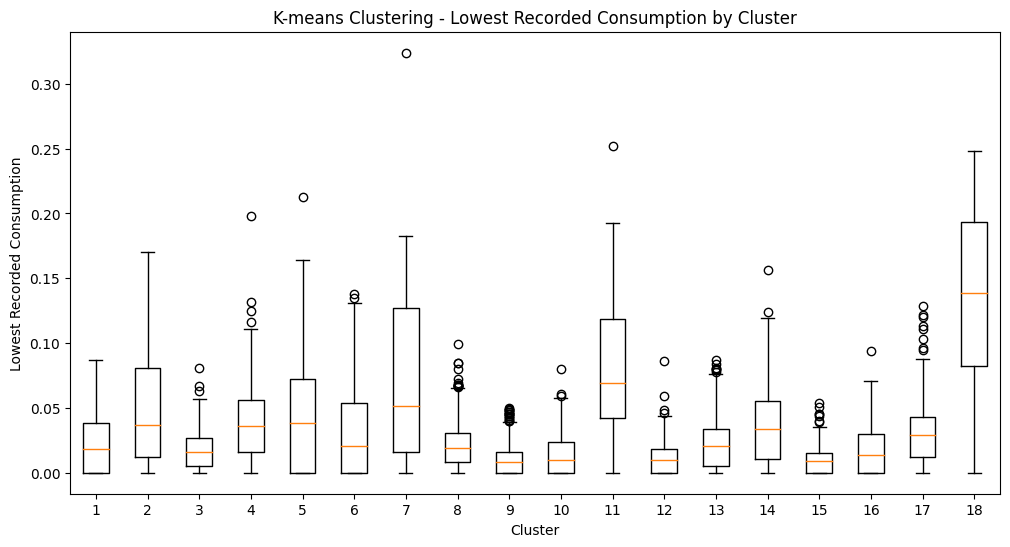

In [39]:
import matplotlib.pyplot as plt
grouped_clusters = kmeans_data.groupby('cluster')
cluster_data = []
for cluster_label, cluster_df in grouped_clusters:
    cluster_data.append(cluster_df['lowest_consumption'].values)

plt.figure(figsize=(12, 6))
plt.boxplot(cluster_data)
plt.xlabel('Cluster')
plt.ylabel('Lowest Recorded Consumption')
plt.title('K-means Clustering - Lowest Recorded Consumption by Cluster')
plt.xticks(range(1, len(cluster_data) + 1), range(1, len(cluster_data) + 1))
plt.show()



In [45]:
# We proceed with all the data's in cluster 15, 14 and 8 and make seperate files for federated learning.
cluster_18_data = merged_data[merged_data['cluster'] == 17]
cluster_14_data = merged_data[merged_data['cluster'] == 13]
cluster_8_data = merged_data[merged_data['cluster'] == 7]
cluster_9_data = merged_data[merged_data['cluster'] == 8]
cluster_4_data = merged_data[merged_data['cluster'] == 3]
cluster_7_data = merged_data[merged_data['cluster'] == 6]
cluster_18_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375753 entries, 2704025 to 135511765
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   LCLid     375753 non-null  object
 1   stdorToU  375753 non-null  object
 2   DateTime  375753 non-null  object
 3   KWH/hh    375753 non-null  object
 4   cluster   375753 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 15.8+ MB


In [43]:
cluster_18_data.to_csv('Cluster15data.csv', index=False)
cluster_14_data.to_csv('Cluster14data.csv', index=False)
cluster_8_data.to_csv('Cluster8data.csv', index=False)
cluster_9_data.to_csv('Cluster9data.csv', index=False)
cluster_4_data.to_csv('Cluster4data.csv', index=False)
cluster_7_data.to_csv('Cluster7data.csv', index=False)

In [44]:
cluster_18_data.to_csv('Cluster15data.csv', index=False)